In [4]:
class Animal:
    def __init__(self, name):
        self.name = name
    def sound(self):
        pass



class Dog(Animal):
    def sound(self):
        return "Woof!"

class Cat(Animal):
    def sound(self):
        return "Meow!"

# Creating instances of Dog and Cat
dog = Dog("Buddy")
cat = Cat("Whiskers")

# Accessing attributes and methods
print(dog.name)   # Output: Buddy
print(dog.sound()) # Output: Woof!

print(cat.name)   # Output: Whiskers
print(cat.sound()) # Output: Meow!


Buddy
Woof!
Whiskers
Meow!


In [5]:
cat.print_something()

AttributeError: 'Cat' object has no attribute 'print_something'

[{'cluster_id': 0, 'listTargets': [{'location': [804.9144144934472, 583.2223115273475], 'target_id': 5}, {'location': [874.5323216918364, 557.5694093138732], 'target_id': 7}, {'location': [848.7818580252687, 313.5353746282513], 'target_id': 8}, {'location': [735.762250550285, 335.8581955812355], 'target_id': 10}, {'location': [904.9579749481715, 523.2023640304026], 'target_id': 12}, {'location': [942.7646210092371, 302.57808682838663], 'target_id': 13}, {'location': [665.8383419194578, 453.97966524250364], 'target_id': 18}, {'location': [792.2282326764979, 497.7837390649409], 'target_id': 21}, {'location': [984.4436535304645, 179.2197903352477], 'target_id': 22}, {'location': [757.8153128367214, 423.424127324724], 'target_id': 24}, {'location': [651.1786384181449, 339.3419318635773], 'target_id': 25}, {'location': [828.3154427838664, 342.3679340490257], 'target_id': 27}, {'location': [521.7112857728886, 500.78496642380344], 'target_id': 29}, {'location': [948.8454217775583, 362.1125441

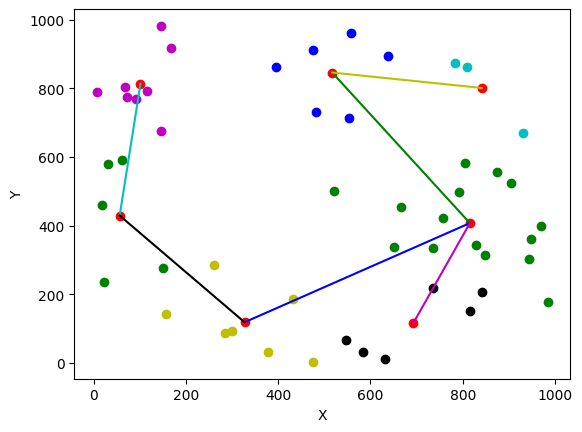

In [48]:
import json
import math
import matplotlib.pyplot as plt
from itertools import cycle

file_path = "clusters1.json"
output_file_path = "edges.json"

def calDistanceBS(cluster):
    distance =  math.sqrt((cluster['centroid'][0] - 500)**2 + (cluster['centroid'][1] - 500)**2)
    return distance

def calDistanceCluster(cluster1, cluster2):
    distance =  math.sqrt((cluster1['centroid'][0] - cluster2['centroid'][0])**2 + (cluster1['centroid'][1] - cluster2['centroid'][1])**2)
    return distance

def nearest_cluster_neighbor(cluster, listClusters):
    min_distance_cluster = float('inf')
    nearest_neighbor = None
    for other_cluster in listClusters:
        if cluster != other_cluster and calDistanceBS(other_cluster) < calDistanceBS(cluster):
            distance = calDistanceCluster(cluster, other_cluster)
            if distance < min_distance_cluster:
                min_distance_cluster = distance
                nearest_neighbor = other_cluster
    return nearest_neighbor

def createEdges():
    with open(file_path, "r") as json_file:
        listClusters = json.load(json_file)
    edges = []
    for cluster in listClusters:
        nearest_neighbor = nearest_cluster_neighbor(cluster, listClusters)
        if nearest_neighbor:
            edges.append((cluster, nearest_neighbor))
    edge_colors = cycle([ 'g', 'b', 'y', 'c', 'm', 'k'])

    # Vẽ các điểm trong các cluster và điểm centroid

    # Màu cho các cluster
    cluster_colors = ['g', 'b', 'y', 'c', 'm', 'k']
    print(listClusters)

    for i in range(len(listClusters)):
        cluster_data = listClusters[i]
        color = cluster_colors[i % len(cluster_colors)]  
        # Trích xuất các điểm và điểm centroid từ dữ liệu cluster
        points = [target["location"] for target in cluster_data["listTargets"]]
        centroid = cluster_data["centroid"]
        x_points = [point[0] for point in points]
        y_points = [point[1] for point in points]
        # Tạo mảng tọa độ x và y của điểm centroid
        centroid_x = centroid[0]
        centroid_y = centroid[1]
        # Vẽ các điểm trong cluster (trừ điểm centroid)
        plt.scatter(x_points, y_points, color=color)
        # Vẽ điểm centroid
        plt.scatter(centroid_x, centroid_y, color='red')
    # Vẽ các cạnh giữa các cluster
    for edge, color in zip(edges, edge_colors):
        # Trích xuất tọa độ của các điểm trong cạnh
        x_values = [edge[0]['centroid'][0], edge[1]['centroid'][0]]
        y_values = [edge[0]['centroid'][1], edge[1]['centroid'][1]]
        plt.plot(x_values, y_values, color=color)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    return edges

edges = createEdges()
with open(output_file_path, "w") as output_file:
    json.dump(edges, output_file)



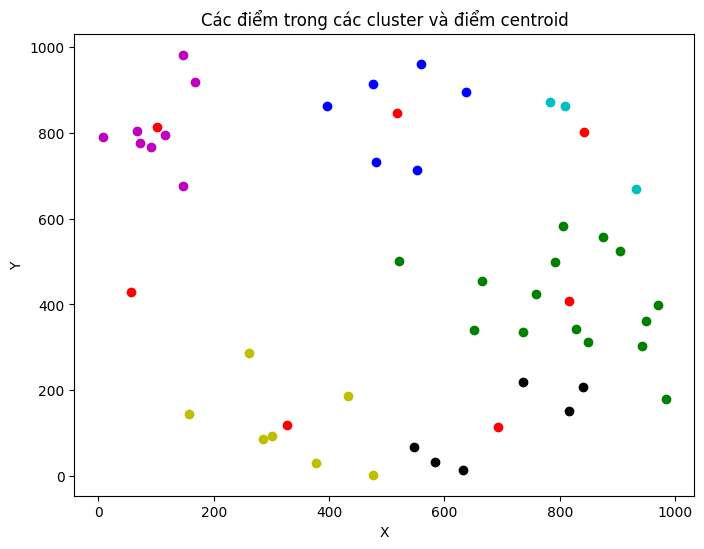

{'cluster_id': 5, 'listTargets': [{'location': [735.454152988365, 219.48706751677983], 'target_id': 3}, {'location': [547.0181794155146, 67.64216436910553], 'target_id': 16}, {'location': [840.7021217206635, 207.19748810479788], 'target_id': 19}, {'location': [631.6201181404572, 13.366874986175837], 'target_id': 23}, {'location': [584.1431014223234, 33.563824972322905], 'target_id': 26}, {'location': [815.3695276329561, 151.2164993739573], 'target_id': 31}], 'centroid': [692.3845335533799, 115.41231988718988]}


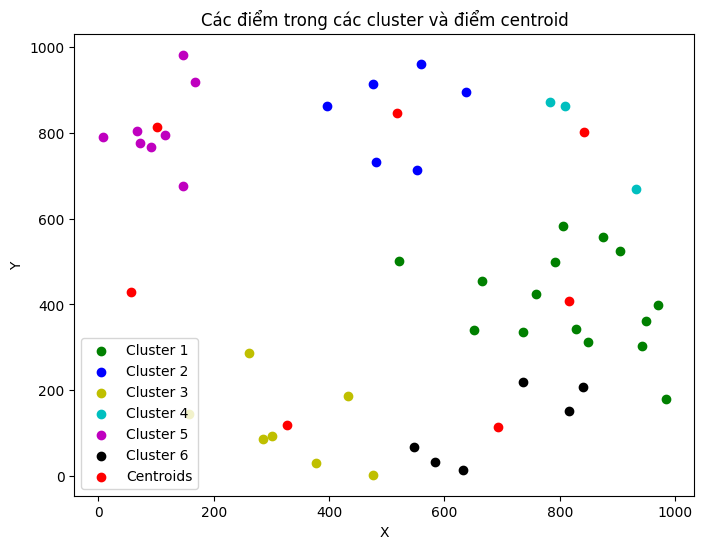

In [37]:
import json
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file JSON
file_path = "clusters1.json"
with open(file_path, "r") as json_file:
    clusters_data = json.load(json_file)
print(cluster_data)
# Vẽ các điểm trong các cluster và điểm centroid
plt.figure(figsize=(8, 6))  # Đặt kích thước của biểu đồ

# Màu cho các cluster
cluster_colors = ['g', 'b', 'y', 'c', 'm', 'k']

for i, (cluster_data, color) in enumerate(zip(clusters_data, cluster_colors)):
    # Trích xuất các điểm và điểm centroid từ dữ liệu cluster
    points = [target["location"] for target in cluster_data["listTargets"]]
    centroid = cluster_data["centroid"]

    # Tạo mảng tọa độ x và y của các điểm
    x_points = [point[0] for point in points]
    y_points = [point[1] for point in points]

    # Tạo mảng tọa độ x và y của điểm centroid
    centroid_x = [centroid[0]]
    centroid_y = [centroid[1]]

    # Vẽ các điểm trong cluster (trừ điểm centroid)
    plt.scatter(x_points, y_points, color=color, label=f'Cluster {i+1}')

# Vẽ tất cả các điểm centroid với màu đỏ
plt.scatter([cluster_data["centroid"][0] for cluster_data in clusters_data],
            [cluster_data["centroid"][1] for cluster_data in clusters_data],
            color='red', label='Centroids')

# Đặt nhãn và tiêu đề cho biểu đồ
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Các điểm trong các cluster và điểm centroid')
plt.legend()
# plt.grid(True)

# Hiển thị biểu đồ
plt.show()


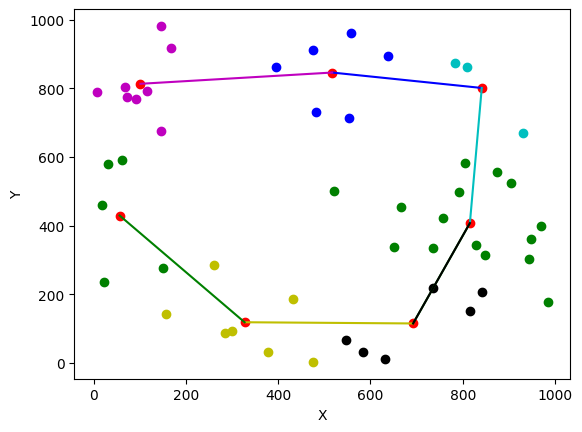

In [50]:
import json
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import cKDTree
from itertools import cycle

file_path = "clusters1.json"
output_file_path = "edges.json"

def calDistanceBS(cluster):
    distance =  np.sqrt((cluster['centroid'][0] - 500)**2 + (cluster['centroid'][1] - 500)**2)
    return distance

def calDistanceCluster(cluster1, cluster2):
    distance =  np.sqrt(np.sum((np.array(cluster1['centroid']) - np.array(cluster2['centroid']))**2))
    return distance

def nearest_cluster_neighbor(cluster, listClusters, kdtree):
    nearest_neighbor_idx = kdtree.query_ball_point(cluster['centroid'], calDistanceBS(cluster))
    if len(nearest_neighbor_idx) > 1:
        nearest_neighbor_idx.remove(listClusters.index(cluster))
    if nearest_neighbor_idx:
        nearest_neighbor = listClusters[nearest_neighbor_idx[0]]
        return nearest_neighbor
    else:
        return None

def createEdges():
    with open(file_path, "r") as json_file:
        listClusters = json.load(json_file)
    
    cluster_centroids = [cluster['centroid'] for cluster in listClusters]
    kdtree = cKDTree(cluster_centroids)

    edges = []
    for cluster in listClusters:
        nearest_neighbor = nearest_cluster_neighbor(cluster, listClusters, kdtree)
        if nearest_neighbor:
            edges.append((cluster, nearest_neighbor))
    
    edge_colors = cycle(['g', 'b', 'y', 'c', 'm', 'k'])

    # Vẽ các điểm trong các cluster và điểm centroid
    cluster_colors = ['g', 'b', 'y', 'c', 'm', 'k']

    for i, cluster_data in enumerate(listClusters):
        color = cluster_colors[i % len(cluster_colors)]  
        points = np.array([target["location"] for target in cluster_data["listTargets"]])
        centroid = np.array(cluster_data["centroid"])
        plt.scatter(points[:, 0], points[:, 1], color=color)
        plt.scatter(centroid[0], centroid[1], color='red')

    for edge, color in zip(edges, edge_colors):
        x_values = [edge[0]['centroid'][0], edge[1]['centroid'][0]]
        y_values = [edge[0]['centroid'][1], edge[1]['centroid'][1]]
        plt.plot(x_values, y_values, color=color)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    return edges

edges = createEdges()

with open(output_file_path, "w") as output_file:
    json.dump(edges, output_file)
